In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
data = pd.read_csv("Data Historis SBux .csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  
              Date    Open    High     Low   Close Volume     Market Cap
1551  May 02, 2013  116.38  125.60   92.28  105.21      -  1,292,190,000
1552  May 01, 2013  139.00  139.89  107.72  116.99      -  1,542,820,000
1553  Apr 30, 2013  144.00  146.93  134.05  139.00      -  1,597,780,000
1554  Apr 29, 2013  134.44  147.49  134.00  144.54      -  1,491,160,000
1555  Apr 28, 2013  135.30  135.98  132.10  134.21      -  1,500,520,000
<class 'pandas.core.f

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
data = pd.read_csv("Data Historis SBux .csv",index_col= 'Date')
print(data.head(5))
data.info()
data.index = pd.to_datetime(data.index)
print(data.index)
data.head(5)

                 Open     High      Low    Close         Volume  \
Date                                                              
Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

                  Market Cap  
Date                          
Jul 31, 2017  45,535,800,000  
Jul 30, 2017  44,890,700,000  
Jul 29, 2017  46,246,700,000  
Jul 28, 2017  44,144,400,000  
Jul 27, 2017  41,816,500,000  
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [ ]:
data = data.sort_index()
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [ ]:
data = data['Close']

In [ ]:
ts = data

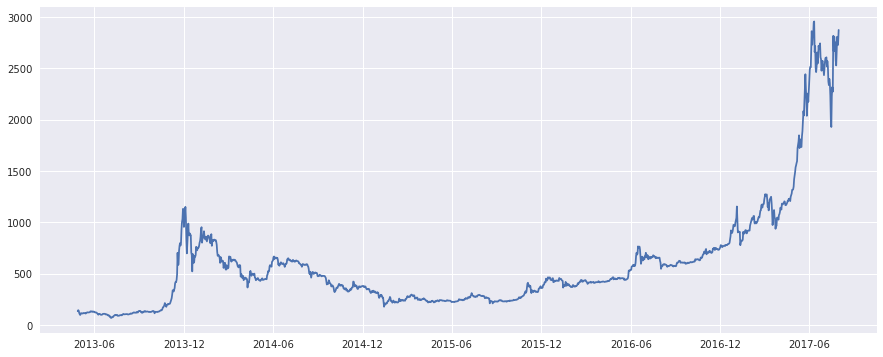

In [ ]:
plt.plot(ts)

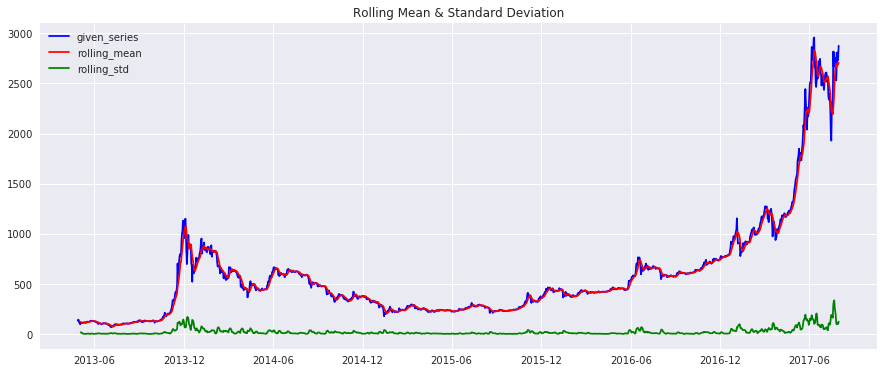

Results of Dickey-Fuller Test:
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()

    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_for_stationary(ts)

### The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies  with time and is not stationary. The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary


# Transforming the data - (to eliminate trend)

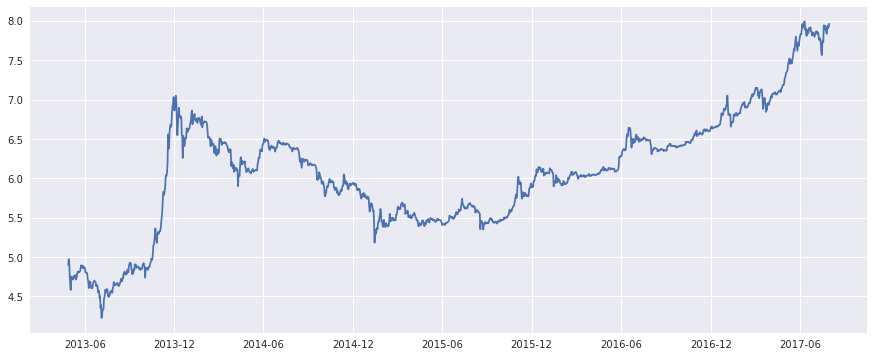

In [ ]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [ ]:
ts_logtransformed.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
2013-05-03    4.582413
2013-05-04    4.722953
2013-05-05    4.752814
2013-05-06    4.721174
2013-05-07    4.714025
Name: Close, dtype: float64

# Smoothing by Rolling average

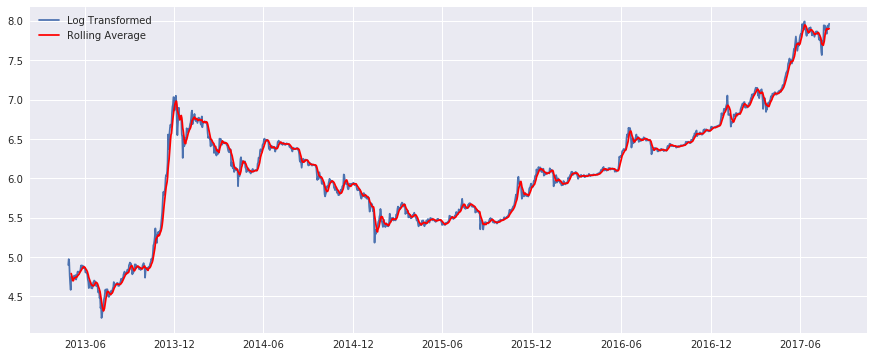

In [ ]:
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')


In [ ]:
Rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [ ]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2017-07-22    0.151593
2017-07-23    0.073239
2017-07-24    0.051861
2017-07-25   -0.030130
2017-07-26   -0.063797
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64

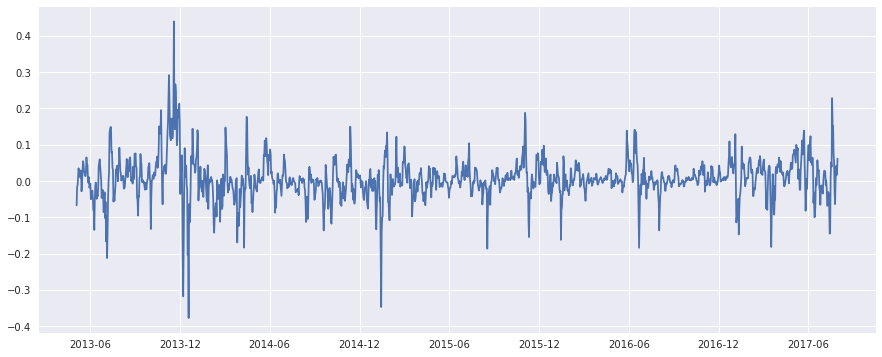

In [ ]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

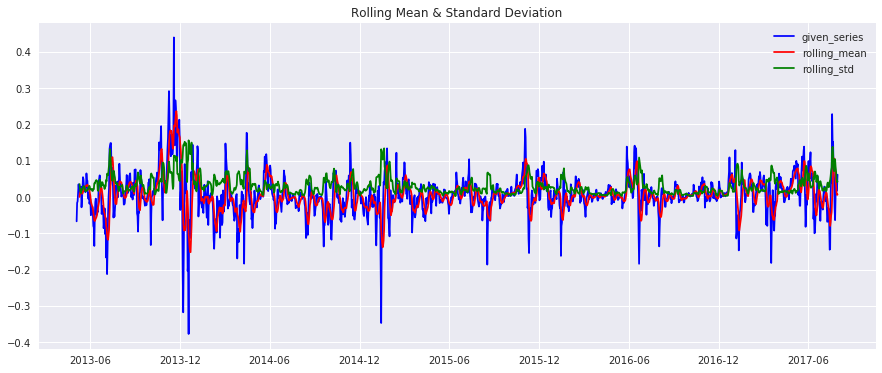

Results of Dickey-Fuller Test:
Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [ ]:
test_for_stationary(log_Rolling_difference)

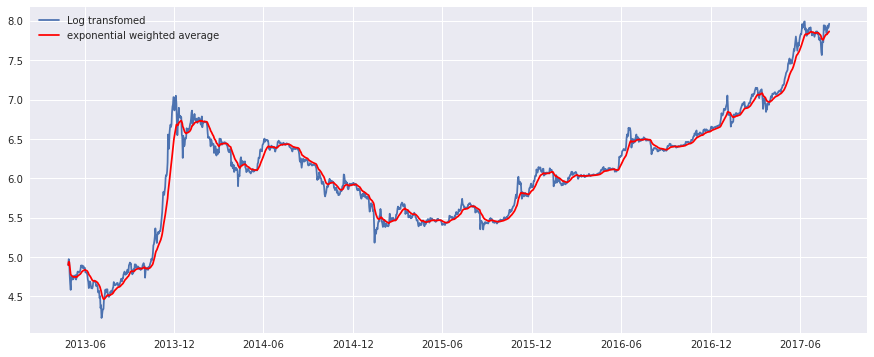

In [ ]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [ ]:
expwighted_avg.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.938315
2013-04-30    4.936906
2013-05-01    4.886513
2013-05-02    4.830850
2013-05-03    4.778564
2013-05-04    4.768079
2013-05-05    4.765448
2013-05-06    4.758372
2013-05-07    4.751720
Name: Close, dtype: float64

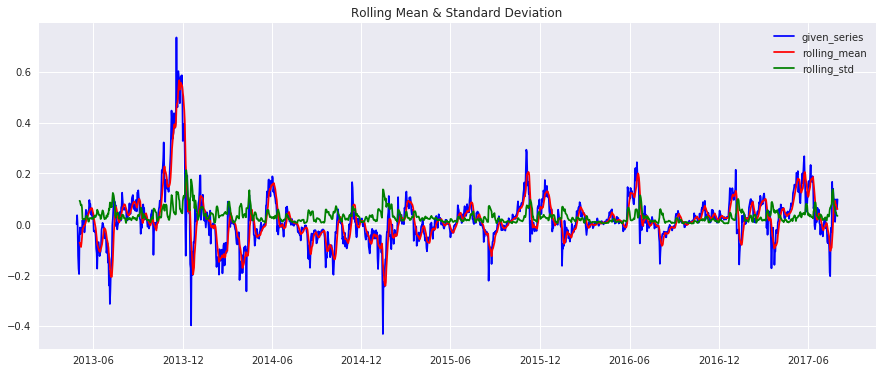

Results of Dickey-Fuller Test:
Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


In [ ]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

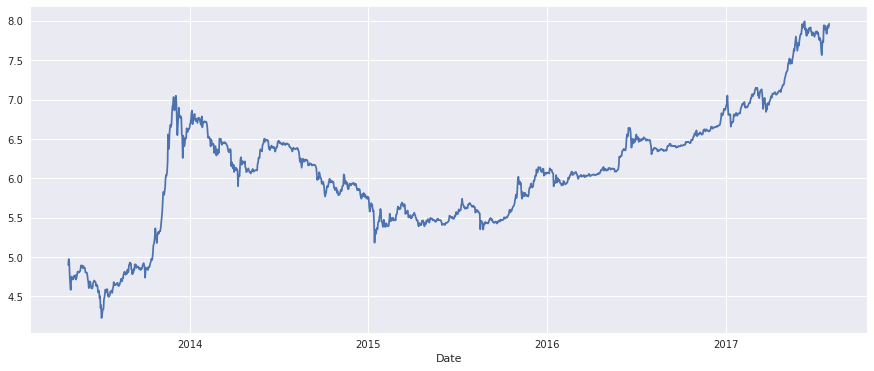

In [ ]:
ts_logtransformed.plot()

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

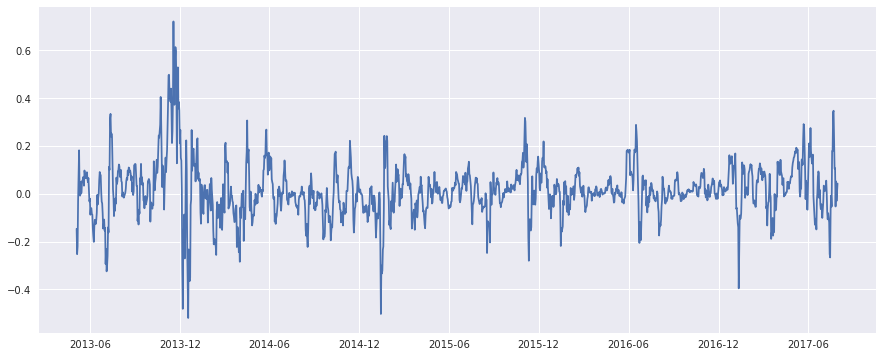

In [ ]:
    ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
    plt.plot(ts_diff_logtrans)
    ts_diff_logtrans.head(10)

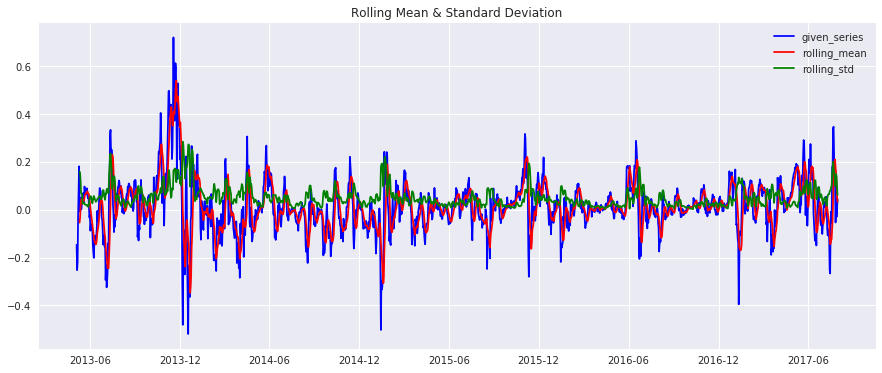

Results of Dickey-Fuller Test:
Test Statistic                -6.523574e+00
p-value                        1.027774e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


In [ ]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

# Forecasting

In [ ]:
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

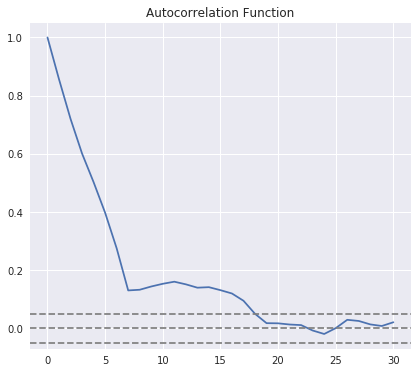

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

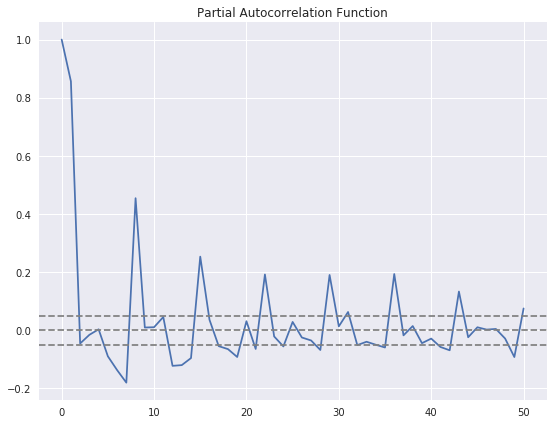

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

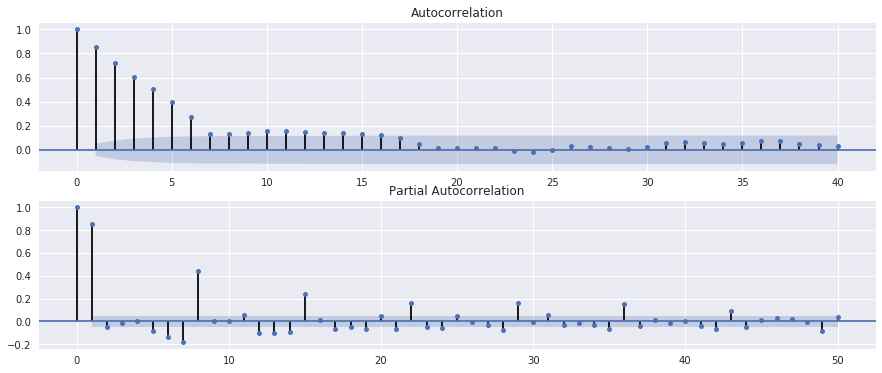

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

# AR Model

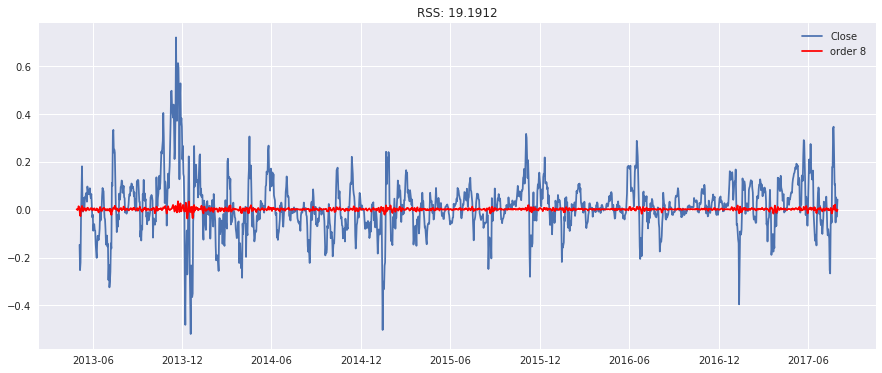

In [ ]:
model = ARIMA(ts_logtransformed, order=(8, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

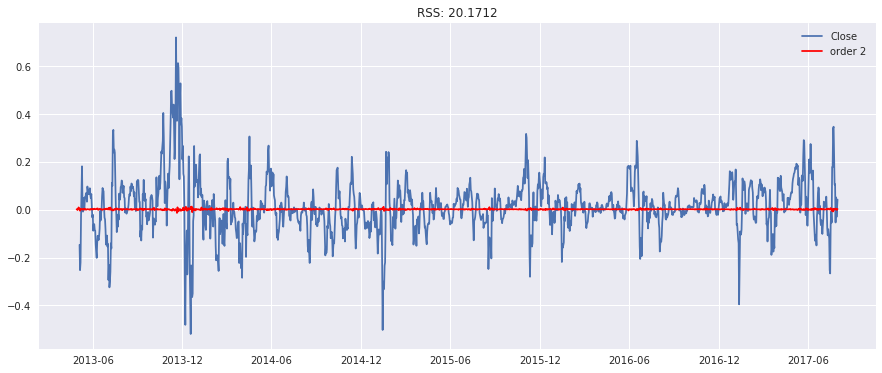

In [ ]:
model = ARIMA(ts_logtransformed, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')



In [ ]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 09 Nov 2017   AIC                          -5401.380
Time:                        16:51:17   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.057   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

# MA model

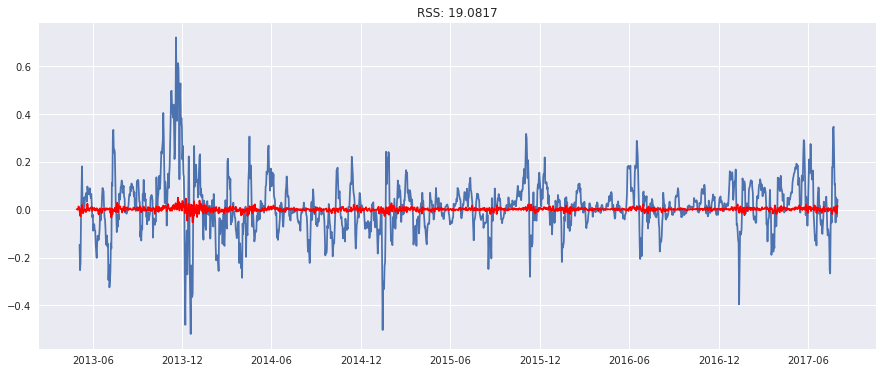

In [ ]:
model = ARIMA(ts_logtransformed, order=(0, 1,18))
results_MA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))


In [ ]:
#model summary
print(results_MA.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 09 Nov 2017   AIC                          -5414.646
Time:                        16:54:32   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

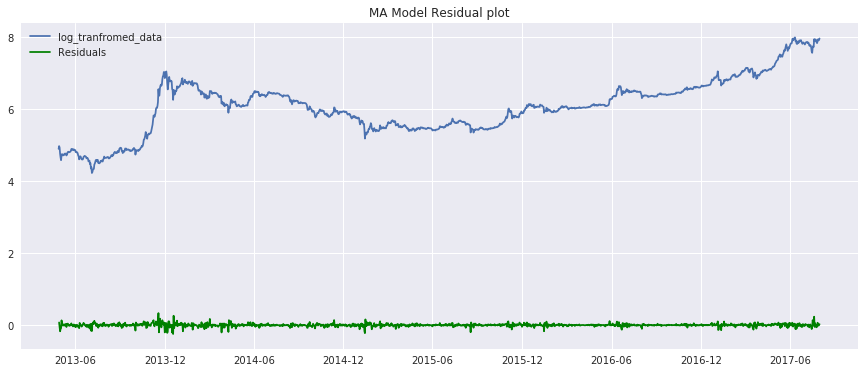

In [ ]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


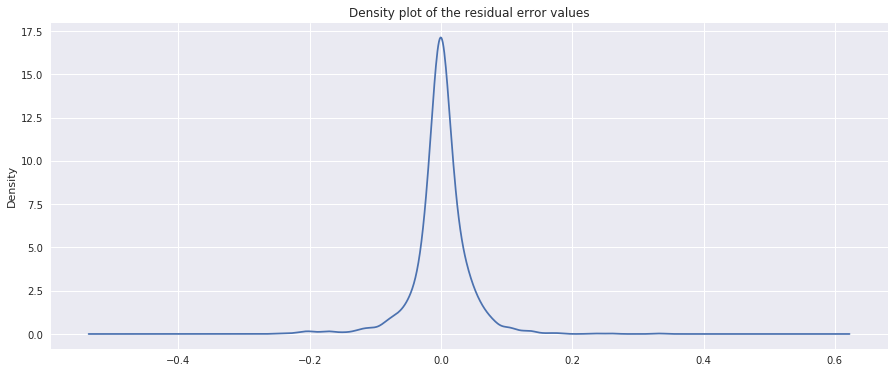

In [ ]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

# ARIMA Combined model

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


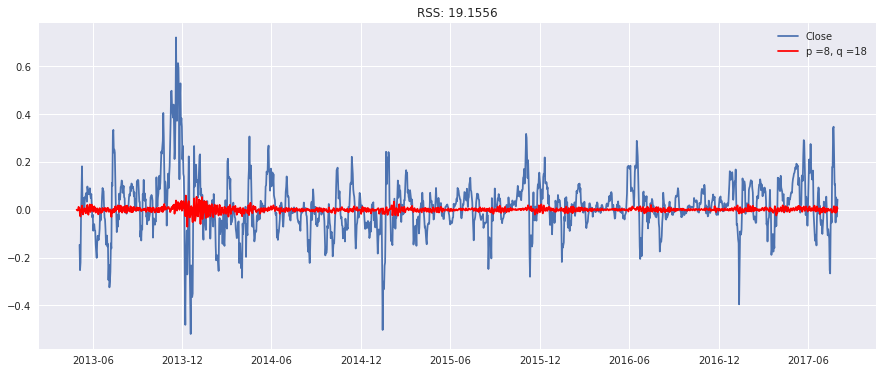

In [ ]:
model = ARIMA(ts_logtransformed, order=(8, 1, 18))
results_ARIMA = model.fit(trend= 'nc', disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

We can derive the Summary of the ARIMA model as follows explaining the results

In [ ]:
#model summary
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(8, 1, 18)   Log Likelihood                2740.102
Method:                       css-mle   S.D. of innovations              0.042
Date:                Thu, 09 Nov 2017   AIC                          -5426.203
Time:                        17:04:50   BIC                          -5281.774
Sample:                    04-29-2013   HQIC                         -5372.495
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.Close     -0.7103        nan        nan        nan         nan         nan
ar.L2.D.Close     -0.7247        nan        nan        nan         nan         nan
ar.L3.D.Close     -1.3433      0.134

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


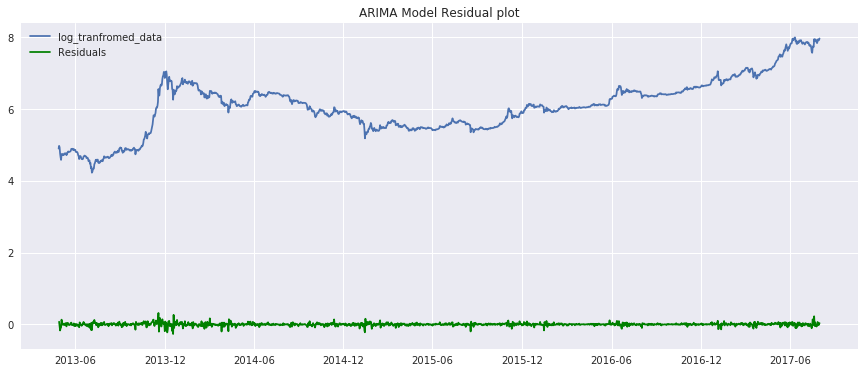

In [ ]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1555.000000
mean        0.001535
std         0.041545
min        -0.266411
25%        -0.012498
50%         0.001836
75%         0.017867
max         0.318732
dtype: float64


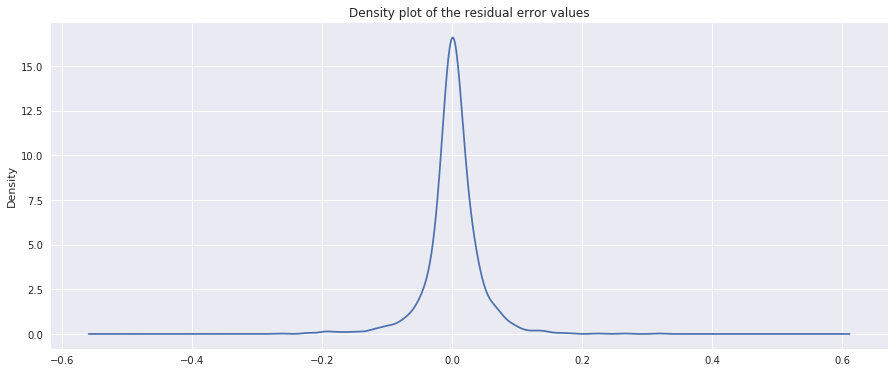

In [ ]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

## Using Combined ARIMA model to predict and forecast

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.000000
2013-04-30    0.000214
2013-05-01   -0.003366
2013-05-02   -0.000140
2013-05-03    0.012158
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.000000
2013-04-30    0.000214
2013-05-01   -0.003152
2013-05-02   -0.003292
2013-05-03    0.008866
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.899406
2013-04-30    4.899620
2013-05-01    4.896254
2013-05-02    4.896114
dtype: float64

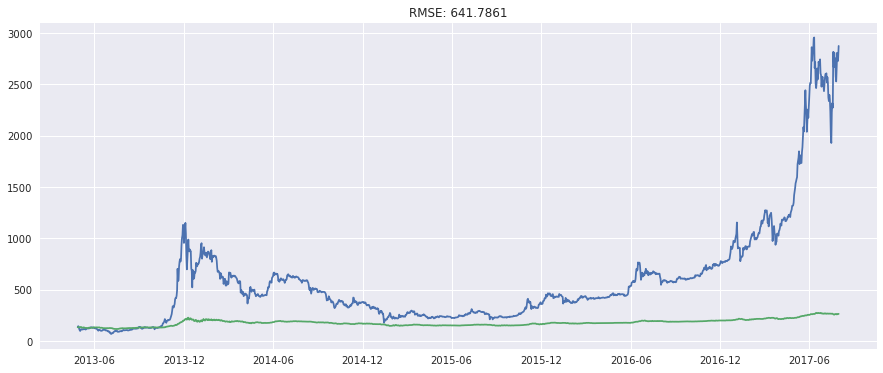

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

In [ ]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2871.243213
2017-08-02    2940.699509
2017-08-03    2989.790766
2017-08-04    3016.172986
2017-08-05    2953.217515
2017-08-06    2948.120379
2017-08-07    2983.645389
dtype: float64
Test MSE: 63109.487


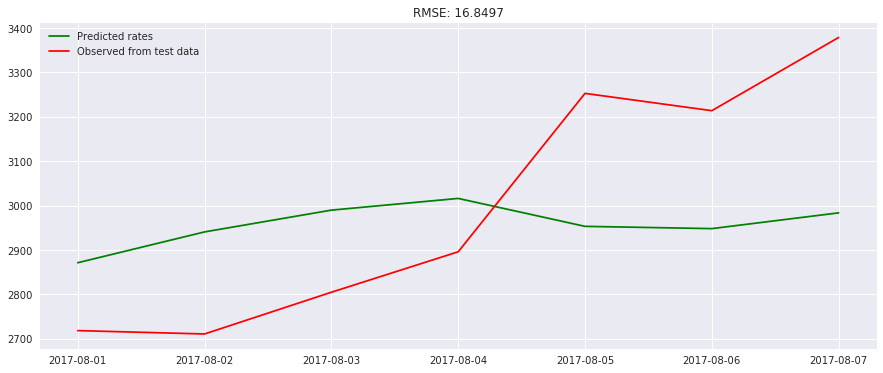

In [ ]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')